# Project: Wrangle and Analyze Data

## Act_Report

<ul>
This report communicates all the insights and displays the visualization(s) produced from your wrangled data.
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json
import re
from datetime import datetime
from functools import reduce
from IPython.display import Image
plt.style.use('seaborn')

%matplotlib inline

### Data Insights and Visualizations

In [2]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(10)

,tweet_id,name,rate_ratio,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,Phineas,1.3,6961,33657,Twitter for iPhone,13.0,10.0,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,Tilly,1.3,5265,29180,Twitter for iPhone,13.0,10.0,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,Archie,1.2,3463,21955,Twitter for iPhone,12.0,10.0,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,Darla,1.3,7183,36744,Twitter for iPhone,13.0,10.0,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,Franklin,1.2,7707,35139,Twitter for iPhone,12.0,10.0,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,NaN,1.3,2583,17724,Twitter for iPhone,13.0,10.0,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6,890971913173991426,Jax,1.3,1644,10307,Twitter for iPhone,13.0,10.0,1,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7,890729181411237888,NaN,1.3,15664,56600,Twitter for iPhone,13.0,10.0,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,Zoey,1.3,3599,24396,Twitter for iPhone,13.0,10.0,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,https://twitter.com/dog_rates/status/890609185150312448/photo/1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,Cassie,1.4,6059,27819,Twitter for iPhone,14.0,10.0,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


In [3]:
df.describe()

,tweet_id,rate_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.872000e+03,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1.872000e+03,1.872000e+03
mean,7.355218e+17,1.083271,2264.318376,7836.950855,11.377137,10.491987,1.200855,0.591462,1.352997e-01,6.061195e-02
std,6.900707e+16,0.985611,4081.809876,11575.376008,12.568822,6.831635,0.557001,0.272339,1.010064e-01,5.090963e-02
min,6.660209e+17,0.000000,11.000000,66.000000,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.756636e+17,1.000000,482.500000,1586.750000,10.000000,10.000000,1.000000,0.360084,5.433222e-02,1.639715e-02
50%,7.058426e+17,1.100000,1068.500000,3326.000000,11.000000,10.000000,1.000000,0.584212,1.192495e-01,5.002455e-02
75%,7.929651e+17,1.200000,2583.750000,9887.750000,12.000000,10.000000,1.000000,0.841640,1.955617e-01,9.254258e-02
max,8.924206e+17,42.000000,70213.000000,143943.000000,420.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


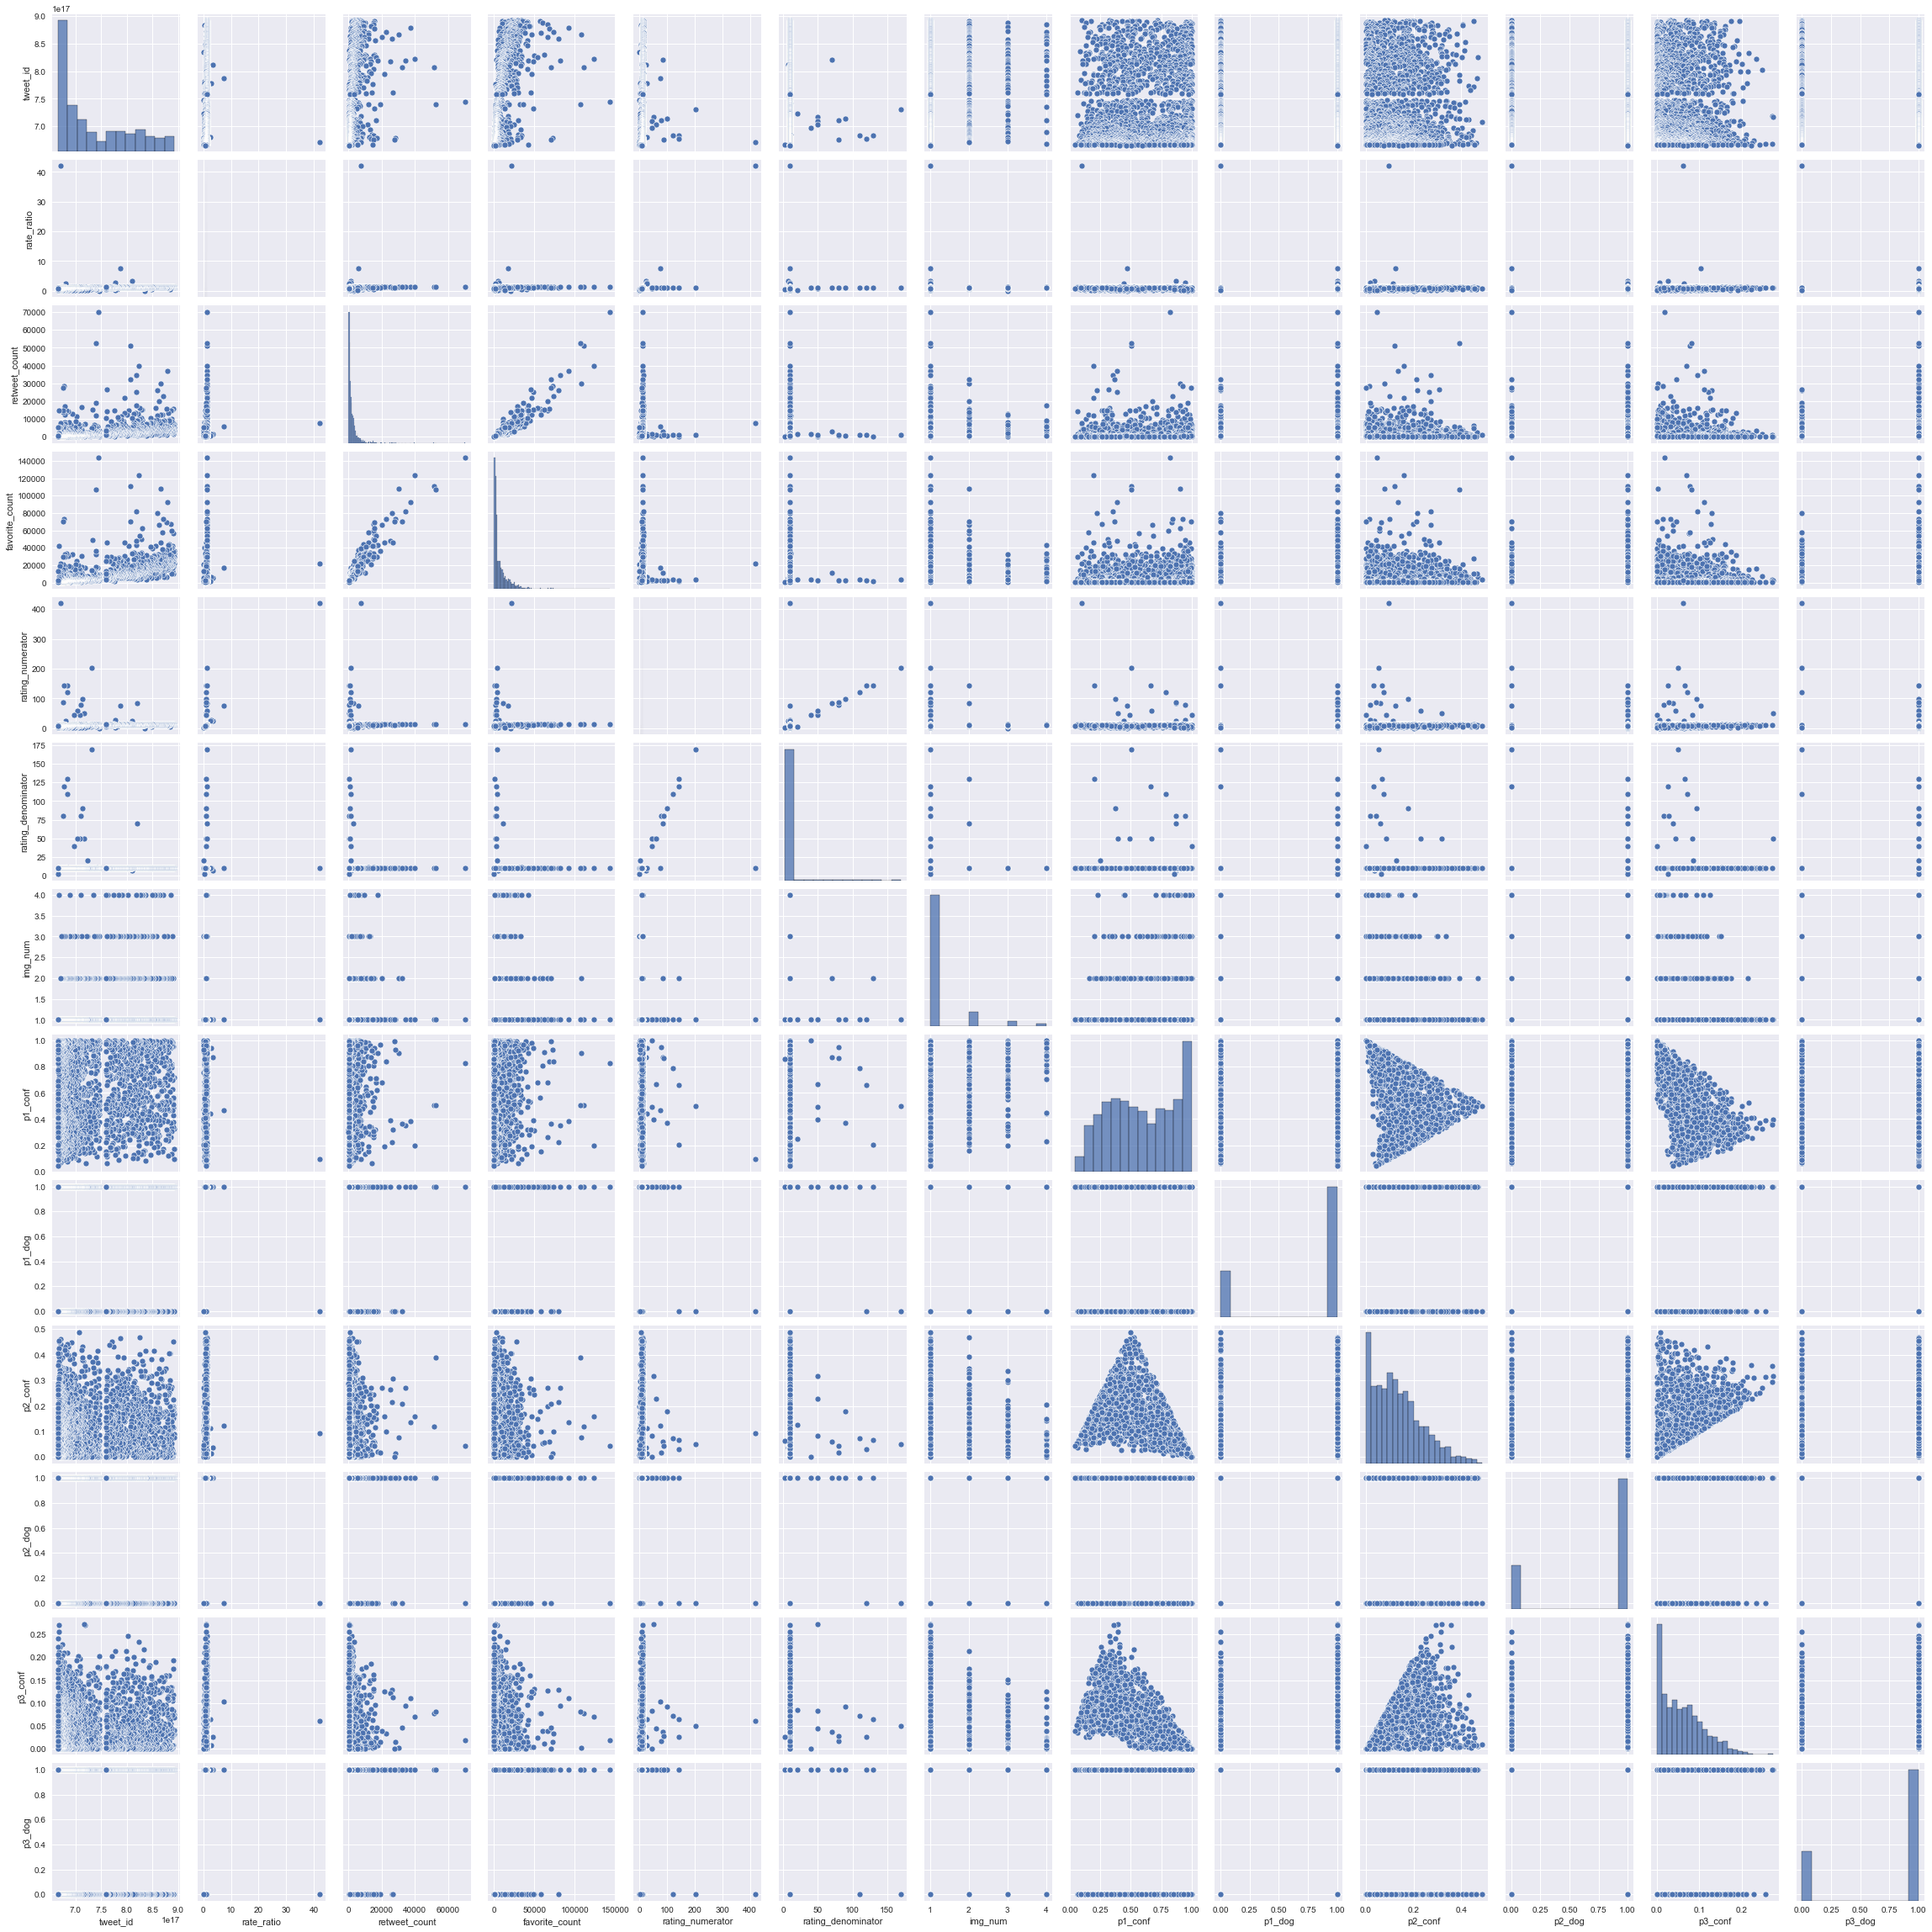

In [4]:
sns.pairplot(df);

### Favorite Count vs Retweet Count

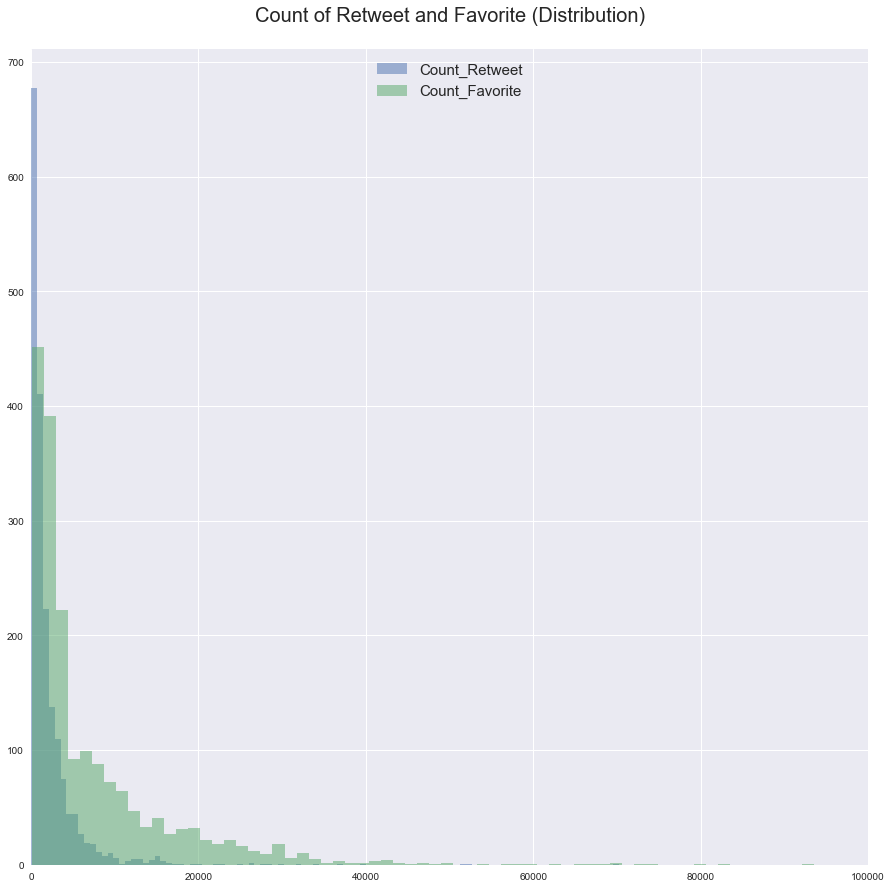

In [5]:
plt.figure(figsize=(15,15))
df.retweet_count.hist(alpha=0.5, bins=100, label='Count_Retweet')
df.favorite_count.hist(alpha=0.5, bins=100, label='Count_Favorite')
plt.title('Count of Retweet and Favorite (Distribution)\n', size = 20)
plt.legend(loc='upper center', fontsize = 15)
plt.xlim(0,100000)
plt.show()

In [6]:
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1872.000000,1872.000000
mean,2264.318376,7836.950855
std,4081.809876,11575.376008
min,11.000000,66.000000
25%,482.500000,1586.750000
50%,1068.500000,3326.000000
75%,2583.750000,9887.750000
max,70213.000000,143943.000000


Looking at the histogram above, we can see that the distribution of both retweets and favorites is considerably skewed to the right; nevertheless, the mean of favorite count (8394) is bigger than the mean of retweet count (2404.5). We also note that the greatest number of favorites obtained by a tweet was 144,219 while the maximum number of retweets received by a tweet was 70,325

### Common Dog Names

C:\Users\BCT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common Dog Names')

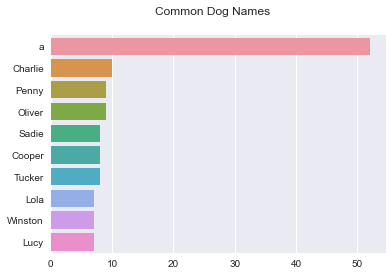

In [7]:
names = df['name'].value_counts()[:10]
sns.barplot(names.values, names.index)
plt.suptitle('Common Dog Names')

The most common dog names are Cooper, Oliver, and Charlie.

### Common Dog Types

C:\Users\BCT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common Dog Type')

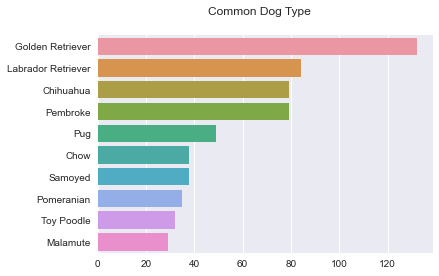

In [8]:
dog_type = df['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Common Dog Type')

### Heat Map for Correlations

The most common dog type are Golden Retriever, Labrador Retriever, Pembroke and Chihuahua

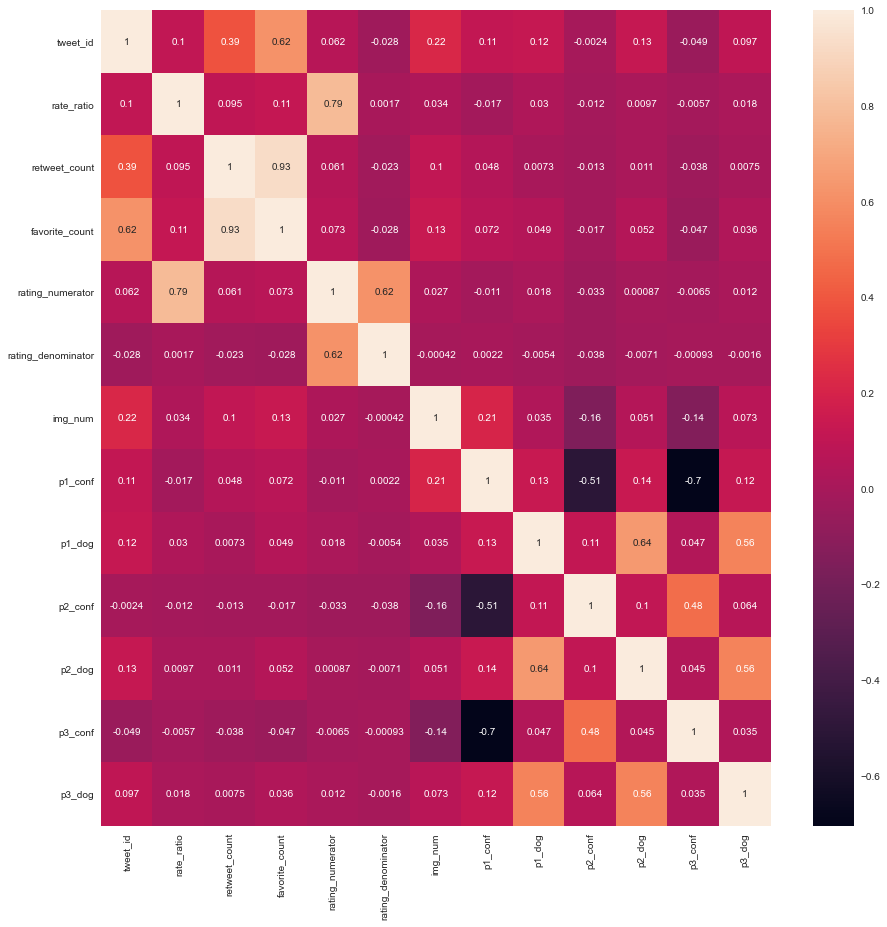

In [9]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:
<li>I observed a strong positive correlation of 0.93 between favorite count and retweet count which buttresses the above results.</li>
<li>I observed a relatively weak correlation of 0.48 between p3_conf and p1_conf which is interesting as different predictions will always have opposing confidence levels.</li>